# A Naive Implementation

1. Generate a random number within the desired range and check if it is unique and if it is then add it to the results.
2. Repeat until the desired number of results have been generated

In [1]:
import random
from typing import Generator

def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    if max_num - min_num + 1 < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")
    
    unique_numbers = set()

    while len(unique_numbers) < batch_size:
        number = random.randint(min_num, max_num)
        if number not in unique_numbers:
            unique_numbers.add(number)
            yield number

In [2]:
list(generate_unique_random_numbers(0, 9, 3))

[9, 1, 6]

We can run it multiple times and plot the results to convince ourselves that it is evenly distributed.

Chi-Square Statistic: 6.420000000000001
P-Value: 0.6972574401517273


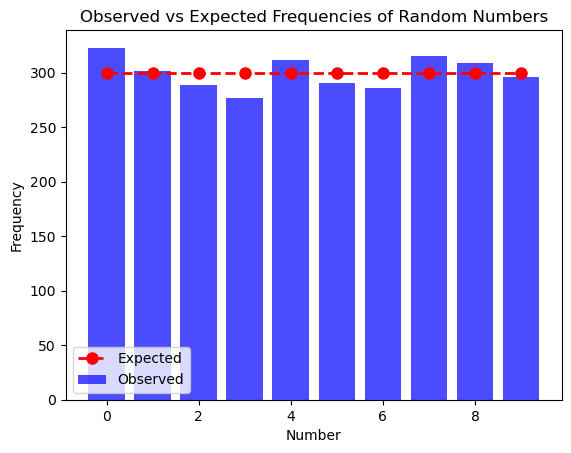

In [3]:
import utils

utils.run_and_plot(generate_unique_random_numbers, 0, 9, 3, 1000)

It is fast even if the range is large.

In [9]:
%time list(generate_unique_random_numbers(0, 10**100, 3))

CPU times: user 56 μs, sys: 1e+03 ns, total: 57 μs
Wall time: 64.1 μs


[688892214506949787253785535128850655325933971286121485623662315716377218005393350202766731772879091,
 9665211976069083114716599257753355910400346493950707692173660524443753209850321584970589704030523379,
 5658000193982876289672110225884844285283471640244773228936632804782281631531847912814569199401610054]

What happens if we want to generate a lot of unique random numbers?

In [5]:
%time utils.run_and_ignore(lambda: generate_unique_random_numbers(0, 10**100, 10**5))

CPU times: user 63.6 ms, sys: 2.42 ms, total: 66 ms
Wall time: 65.4 ms


In [6]:
%time utils.run_and_ignore(lambda: generate_unique_random_numbers(0, 10**100, 10**6))

CPU times: user 671 ms, sys: 15.6 ms, total: 687 ms
Wall time: 687 ms


In [7]:
%time utils.run_and_ignore(lambda: generate_unique_random_numbers(0, 10**100, 10**7))

CPU times: user 7.42 s, sys: 157 ms, total: 7.58 s
Wall time: 7.61 s


In [8]:
%time utils.run_and_ignore(lambda: generate_unique_random_numbers(0, 10**100, 10**8))

CPU times: user 1min 17s, sys: 2.38 s, total: 1min 20s
Wall time: 1min 20s
